In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
ruta=r'D:\MateriasM\Teoría de las Finanzas'

def matrizRendimientos(matrizActivos):
    df=matrizActivos[['Date']][1:].reset_index(drop='True')
    for i in matrizActivos.columns:
        if i != 'Date':
            cierres=matrizActivos[i][1:].reset_index(drop='True')
            cierres_ant=matrizActivos[i][:-1]
            df[i]=cierres/cierres_ant-1
    return df


VOO=pd.read_csv('VOO.csv')
VEA=pd.read_csv('VEA.csv')
VWO=pd.read_csv('VWO.csv')
VNQ=pd.read_csv('VNQ.csv')
VIXY=pd.read_csv('VIXY.csv')
ETH=pd.read_csv('ETH.csv')
FUNO=pd.read_csv('FUNO11.csv')


listaValores=[VOO, VEA, VWO, VNQ, VIXY, ETH, FUNO]

listaNombres=['VOO', 'VEA', 'VWO', 'VNQ', 'VIXY', 'ETH', 'FUNO']

matriz=VOO[['Date']]


j=0
columnas=['Date']
for i in listaValores:
    matriz = pd.merge(matriz, i.query('Close==Close')[['Date', 'Close']], on=['Date'] )
    matriz[listaNombres[j]]=matriz['Close']
    columnas.append(listaNombres[j])
    matriz=matriz[columnas]
    j+=1


rendimientos=matrizRendimientos(matriz)


rendProm=[]
for i in listaNombres:
    rendProm.append(rendimientos[i].mean())
    
ro=rendimientos[listaNombres].corr()

ro

VOO       VEA       VWO       VNQ      VIXY       ETH      FUNO
VOO   1.000000  0.822772  0.707320  0.713081 -0.771996  0.198180  0.237597
VEA   0.822772  1.000000  0.755802  0.647494 -0.699883  0.235253  0.277356
VWO   0.707320  0.755802  1.000000  0.468274 -0.598838  0.212478  0.203431
VNQ   0.713081  0.647494  0.468274  1.000000 -0.578074  0.060667  0.306923
VIXY -0.771996 -0.699883 -0.598838 -0.578074  1.000000 -0.198197 -0.205652
ETH   0.198180  0.235253  0.212478  0.060667 -0.198197  1.000000  0.121205
FUNO  0.237597  0.277356  0.203431  0.306923 -0.205652  0.121205  1.000000

<AxesSubplot:>

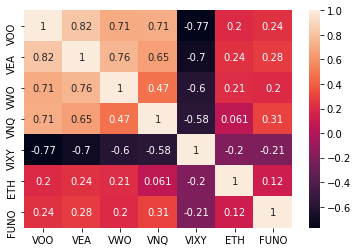

In [2]:
sn.heatmap(ro, annot=True)


In [3]:
sigma=rendimientos[listaNombres].cov()
sigma

VOO       VEA       VWO       VNQ      VIXY       ETH      FUNO
VOO   0.000119  0.000096  0.000096  0.000100 -0.000417  0.000150  0.000050
VEA   0.000096  0.000116  0.000101  0.000090 -0.000373  0.000176  0.000058
VWO   0.000096  0.000101  0.000156  0.000075 -0.000371  0.000185  0.000049
VNQ   0.000100  0.000090  0.000075  0.000166 -0.000370  0.000054  0.000077
VIXY -0.000417 -0.000373 -0.000371 -0.000370  0.002459 -0.000684 -0.000198
ETH   0.000150  0.000176  0.000185  0.000054 -0.000684  0.004841  0.000164
FUNO  0.000050  0.000058  0.000049  0.000077 -0.000198  0.000164  0.000378

In [4]:
### simulaciones

simulaciones=pd.DataFrame(columns=listaNombres)
tam=5000
for i in range(len(listaNombres)):
    if i==0:
        simulaciones[listaNombres[i]]=np.random.uniform(size=tam)
    elif i < len(listaNombres)-1:
        a=simulaciones[listaNombres[0:i]].sum(axis=1)
        simulaciones[listaNombres[i]]=[np.random.uniform( low=0.0, high=1.0-j) for j in a]
    elif i==len(listaNombres)-1:
        simulaciones[listaNombres[i]]=1-simulaciones[listaNombres[0:i]].sum(axis=1)


rendimientosEsp=simulaciones.dot(rendProm)
paso1=sigma.dot(simulaciones.transpose())
var=simulaciones.dot(paso1).to_numpy().diagonal()
simulaciones['riesgo']=var**0.5
simulaciones['rendimientos']=rendimientosEsp
simulaciones

VOO       VEA       VWO       VNQ      VIXY       ETH      FUNO  \
0     0.577623  0.008351  0.183154  0.068929  0.105358  0.054872  0.001713   
1     0.898949  0.056345  0.024970  0.006583  0.007309  0.002564  0.003280   
2     0.059999  0.565884  0.286542  0.003573  0.014648  0.032009  0.037346   
3     0.721350  0.222835  0.028049  0.011833  0.015198  0.000355  0.000381   
4     0.253348  0.487505  0.221184  0.026564  0.008869  0.001050  0.001481   
...        ...       ...       ...       ...       ...       ...       ...   
4995  0.764187  0.054335  0.016576  0.075065  0.027203  0.010166  0.052468   
4996  0.242333  0.495163  0.184442  0.015221  0.023802  0.001441  0.037598   
4997  0.771286  0.013734  0.006414  0.065624  0.097689  0.029427  0.015827   
4998  0.452999  0.250627  0.004976  0.241053  0.033058  0.012972  0.004315   
4999  0.152559  0.436218  0.177787  0.149700  0.027277  0.002827  0.053632   

        riesgo  rendimientos  
0     0.007349      0.001209  
1     0.010359      0.001152  
2     0.010156      0.001445  
3     0.009727      0.001084  
4     0.009891      0.001145  
...        ...           ...  
4995  0.009149      0.001068  
4996  0.009064      0.001041  
4997  0.006907      0.000934  
4998  0.008871      0.001042  
4999  0.008795      0.000980  

[5000 rows x 9 columns]

In [5]:
import plotly.express as px

fig_sim = px.scatter(simulaciones, x="riesgo", y="rendimientos", hover_data=listaNombres)

fig_sim.show()

In [6]:
####Se calcula el portafolio de varianza mínima absoluta

def portMinVar(sigma, listanombres):
    ###Cálculo de los pesos del portafolio de mínima varianza absoluta

    ##1. Matriz aumentada

    M=sigma.copy()
    M['aum']=1

    renglon=np.ones(len(listanombres))
    renglon=np.append(renglon,0)

    beta=np.zeros(len(listanombres))
    beta=np.append(beta,1)

    M = M.append(dict(zip(M.columns, renglon)), ignore_index=True)

    w=np.linalg.solve(M,beta)

    return w[:-1] ##Quitamos el peso del renglón auxiliar

W=portMinVar(sigma, listaNombres)
W

array([ 4.75884570e-01,  2.11779706e-01,  7.05327307e-02,  5.49467495e-02,
        1.47063855e-01, -1.91399935e-04,  3.99837874e-02])

In [7]:
####Rendimiento y Varianza Mínimos

def datosPesos(pesos, rendimientos, sigma):
    rendimientosEsp=rendimientos.mean(axis=0)
    
    rendEsperado=(rendimientosEsp*pesos).sum()
    
    p=np.dot(sigma,np.transpose(pesos))
    var=np.dot((pesos),p)
       
    print( 'rendimiento mínimo: {}'.format(rendEsperado))
    print( 'varianza mínima: {}'.format(var**0.5))
    return(rendEsperado, var)

rendMin, varMin=datosPesos(W, rendimientos, sigma)

rendimiento mínimo: 0.0003379468462577425
varianza mínima: 0.005462502703613248


In [8]:
rendimientosEsp=rendimientos[listaNombres].mean()

def portMinVarRend(sigma, rendimientosEsp, rend):
    M2=sigma.copy()
    M2['Esp']=rendimientosEsp
    M2['Gama']=1
    r1=np.append(rendimientosEsp.values,[0,0])
    r2=rendimientosEsp.values/rendimientosEsp.values
    r2=np.append(r2,[0,0])
    M2= M2.append(dict(zip(M2.columns, r1)), ignore_index=True)
    M2= M2.append(dict(zip(M2.columns, r2)), ignore_index=True)

    beta2=np.zeros(len(rendimientosEsp.values))
    beta2=np.append(beta2,[rend, 1])

    W=np.linalg.solve(M2,beta2)
    return W[:-2]


a=np.linspace(rendMin, max(rendimientosEsp), num=200)

columnas=np.append(sigma.columns, ['rendimiento', 'varianza'])

valores=dict(zip(columnas, np.append(W, [rendMin, varMin**0.5])))
frontera=pd.DataFrame(data=valores, index=[0])

for i in a:
    W=portMinVarRend(sigma, rendimientosEsp, i)
    rendim, var= datosPesos(W, rendimientos, sigma)
    renglon=np.append(W,[rendim,var**0.5])
    frontera=frontera.append(dict(zip(frontera.columns, renglon)), ignore_index=True)
    
frontera['Portafolios']="Con Ventas en Corto"
frontera

rendimiento mínimo: 0.00033794684625774264
varianza mínima: 0.005462502703613248
rendimiento mínimo: 0.0003973213104014154
varianza mínima: 0.005472191403860903
rendimiento mínimo: 0.0004566957745450879
varianza mínima: 0.005501155122427514
rendimiento mínimo: 0.0005160702386887608
varianza mínima: 0.005549092047222321
rendimiento mínimo: 0.0005754447028324334
varianza mínima: 0.005615516304232029
rendimiento mínimo: 0.0006348191669761061
varianza mínima: 0.0056997815856978
rendimiento mínimo: 0.0006941936311197791
varianza mínima: 0.005801110482764304
rendimiento mínimo: 0.0007535680952634516
varianza mínima: 0.005918626655638139
rendimiento mínimo: 0.0008129425594071244
varianza mínima: 0.006051387121267068
rendimiento mínimo: 0.0008723170235507971
varianza mínima: 0.006198412429086802
rendimiento mínimo: 0.0009316914876944698
varianza mínima: 0.006358713166804489
rendimiento mínimo: 0.0009910659518381428
varianza mínima: 0.0065313119341631545
rendimiento mínimo: 0.001050440415981815

rendimiento mínimo: 0.0065128911171997055
varianza mínima: 0.034288746510186936
rendimiento mínimo: 0.0065722655813433796
varianza mínima: 0.034610117288198294
rendimiento mínimo: 0.006631640045487052
varianza mínima: 0.03493156432387251
rendimiento mínimo: 0.006691014509630723
varianza mínima: 0.03525308553119651
rendimiento mínimo: 0.0067503889737743974
varianza mínima: 0.03557467889909738
rendimiento mínimo: 0.006809763437918071
varianza mínima: 0.03589634248812721
rendimiento mínimo: 0.006869137902061742
varianza mínima: 0.03621807442732127
rendimiento mínimo: 0.006928512366205414
varianza mínima: 0.03653987291121925
rendimiento mínimo: 0.0069878868303490885
varianza mínima: 0.0368617361970396
rendimiento mínimo: 0.00704726129449276
varianza mínima: 0.03718366260199818
rendimiento mínimo: 0.007106635758636433
varianza mínima: 0.03750565050076257
rendimiento mínimo: 0.0071660102227801056
varianza mínima: 0.037827698323034134
rendimiento mínimo: 0.007225384686923779
varianza mínima: 

VOO       VEA       VWO       VNQ      VIXY       ETH      FUNO  \
0    0.475885  0.211780  0.070533  0.054947  0.147064 -0.000191  0.039984   
1    0.475885  0.211780  0.070533  0.054947  0.147064 -0.000191  0.039984   
2    0.475155  0.209202  0.074456  0.055022  0.144817  0.003898  0.037450   
3    0.474426  0.206623  0.078379  0.055097  0.142571  0.007987  0.034916   
4    0.473696  0.204045  0.082303  0.055173  0.140325  0.012076  0.032382   
..        ...       ...       ...       ...       ...       ...       ...   
196  0.333650 -0.290956  0.835583  0.069628 -0.290991  0.797207 -0.454121   
197  0.332920 -0.293534  0.839507  0.069703 -0.293237  0.801296 -0.456654   
198  0.332191 -0.296112  0.843430  0.069778 -0.295484  0.805385 -0.459188   
199  0.331462 -0.298690  0.847353  0.069854 -0.297730  0.809474 -0.461722   
200  0.330732 -0.301268  0.851277  0.069929 -0.299977  0.813564 -0.464256   

     rendimiento  varianza          Portafolios  
0       0.000338  0.005463  Con Ventas en Corto  
1       0.000338  0.005463  Con Ventas en Corto  
2       0.000397  0.005472  Con Ventas en Corto  
3       0.000457  0.005501  Con Ventas en Corto  
4       0.000516  0.005549  Con Ventas en Corto  
..           ...       ...                  ...  
196     0.011916  0.063705  Con Ventas en Corto  
197     0.011975  0.064029  Con Ventas en Corto  
198     0.012035  0.064354  Con Ventas en Corto  
199     0.012094  0.064678  Con Ventas en Corto  
200     0.012153  0.065002  Con Ventas en Corto  

[201 rows x 10 columns]

In [9]:
from scipy import optimize

def varianzaPort(pesos, sigma):
    p=np.dot(sigma,np.transpose(pesos))
    var=np.dot((pesos),p)
    return(var)

def portCompleto(x):
    return(sum(x)-1)
def rendPort(pesos, rendimientos):
    rendimientosEsp=rendimientos.mean(axis=0)    
    rendEsperado=(rendimientosEsp*pesos).sum()
    return(rendEsperado)

def markowizNumerico(sigma, rendimientos, rendObjetivo=None, regInv=None):
    x=np.zeros(sigma.columns.size)            
    frontera=(0.0,1.0) ##Intervalo para prohibir ventas en corto
    cons=[{'type':'eq', 'fun':portCompleto}] 
    if regInv==None: ### Intervalos sin régimen de inversión
        b=() ##creamos el conjunto de restricciones
        for i in range(sigma.columns.size):
            b=b+(frontera,)
    else:
        b=regInv
    def rendimObjetivo(x):
        return(rendPort(x, rendimientos)-rendObjetivo)
    
    if rendObjetivo!=None:
        restricRendim={'type':'eq', 'fun':rendimObjetivo} 
        cons.append(restricRendim)           

    markowitz=optimize.minimize(varianzaPort, x0=x, args=sigma, constraints=cons, bounds=b,  method='SLSQP', tol=1e-12)
    pesos=markowitz.x
    rendPortafolio=rendPort(pesos, rendimientos)
    varianza=markowitz.fun
    
    return(pesos, rendPortafolio, varianza**0.5)
pesos, rendimNum,varianza=markowizNumerico(sigma, rendimientos, )

a=np.linspace(rendimNum, rendimientosEsp.max(), num=200)

cols2=sigma.columns

cols2=np.append(cols2, ['rendimiento', 'varianza'])

valores=dict(zip(cols2, np.append(pesos, [rendim, varianza])))
frontera_2=pd.DataFrame(data=valores, index=[0])

for i in a:
    
    W, rendim, var= markowizNumerico(sigma, rendimientos,  rendObjetivo=i )
    renglon=np.append(W,[rendim,var])
    frontera_2=frontera_2.append(dict(zip(frontera_2.columns, renglon)), ignore_index=True)
    
frontera_2['Portafolios']="Sin Ventas en Corto"
frontera_2

VOO           VEA       VWO           VNQ          VIXY  \
0    4.758024e-01  2.115319e-01  0.070486  5.516941e-02  1.470871e-01   
1    4.758271e-01  2.114912e-01  0.070506  5.516243e-02  1.470880e-01   
2    4.751314e-01  2.091176e-01  0.074584  5.502448e-02  1.447442e-01   
3    4.744021e-01  2.065400e-01  0.078507  5.509977e-02  1.424982e-01   
4    4.736728e-01  2.039622e-01  0.082429  5.517503e-02  1.402521e-01   
..            ...           ...       ...           ...           ...   
196  0.000000e+00  0.000000e+00  0.021915  0.000000e+00  0.000000e+00   
197  1.409463e-18  3.930233e-19  0.016436  4.065758e-19  0.000000e+00   
198  0.000000e+00  0.000000e+00  0.010958  0.000000e+00  0.000000e+00   
199  2.116921e-19  0.000000e+00  0.005479  9.492618e-20  6.947297e-19   
200  4.389221e-15  4.207072e-16  0.000000  9.684808e-16  0.000000e+00   

              ETH          FUNO  rendimiento  varianza          Portafolios  
0    0.000000e+00  3.992310e-02     0.012153  0.005463  Sin Ventas en Corto  
1    1.084202e-19  3.992547e-02     0.000340  0.005463  Sin Ventas en Corto  
2    4.031010e-03  3.736739e-02     0.000399  0.005473  Sin Ventas en Corto  
3    8.119558e-03  3.483393e-02     0.000459  0.005502  Sin Ventas en Corto  
4    1.220811e-02  3.230048e-02     0.000518  0.005551  Sin Ventas en Corto  
..            ...           ...          ...       ...                  ...  
196  9.780849e-01  0.000000e+00     0.011916  0.068112  Sin Ventas en Corto  
197  9.835636e-01  4.065758e-20     0.011975  0.068479  Sin Ventas en Corto  
198  9.890424e-01  9.502832e-20     0.012035  0.068845  Sin Ventas en Corto  
199  9.945212e-01  0.000000e+00     0.012094  0.069212  Sin Ventas en Corto  
200  1.000000e+00  0.000000e+00     0.012153  0.069578  Sin Ventas en Corto  

[201 rows x 10 columns]

In [10]:
import plotly.graph_objects as go

front=pd.concat([frontera,frontera_2])

fig_2 = go.Figure(data=go.Scatter(x=front.query('Portafolios=="Sin Ventas en Corto"')["varianza"], 
                                  y=front.query('Portafolios=="Sin Ventas en Corto"')["rendimiento"], mode='lines', name='Sin VC'))

fig_2.add_trace(go.Scatter(x=front.query('Portafolios!="Sin Ventas en Corto"')["varianza"], 
                                  y=front.query('Portafolios!="Sin Ventas en Corto"')["rendimiento"], mode='lines', name='Con VC'))

fig_2.add_trace(go.Scatter(x=simulaciones['riesgo'], y=simulaciones['rendimientos'], mode='markers'))
fig_2.show()